# PHYS 481 Assignment 7: Poisson’s Equation
## Due: Dec 6 (23:59 pm)

### Monica A. Bellamy (3009896)
### Sachin Sharma (30118711)
### Max Stronge (30064749) 


Remember to write an introduction [2 pts] and conclusion [2 pts].

In [2]:
# Load standard libraries for numerical methods and plotting.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
------------
<span style="color:palevioletred;"> In this assignment, we explore the electrostatics of a rectangular channel formed by two parallel, infinitely long grounded metal plates connected by narrower metal strips at a constant potential. The first question involves obtaining both an analytic solution through separation of variables and a numerical solution using Jacobi iteration for Laplace's equation in 2D, with subsequent comparison through contour plots. Moving to the second question, the scenario is revisited with the introduction of uniform charge densities, allowing for an investigation into the impact of varying charge densities on the electric potential between the plates. Lastly, the third question involves a direct matrix solution for a specific charge density, providing an opportunity to compare the results obtained via matrix solution with those from the numerical approach explored in question 2.

## Question 1 [5 pts]

[Griffiths example 3.4] Two infinitely long grounded metal plates lie parallel to the 𝑥𝑧 plane, one at 𝑦 = 0, the other at 𝑦 = 𝑎 = 5 cm. They are connected at 𝑥 = ±𝑏 = ±4 cm by narrower metal strips maintained at a constant potential 𝑉0 = 4 Volts to form a rectangular channel. A thin layer of insulation at each corner allows the sides to be maintained at different potentials. An analytic solution to this boundary value problem can be obtained through separation of variables as:

$𝑉(𝑥, 𝑦) = \frac{4V_0}{\pi} \sum_{n=1,3,5...} \frac{1}{n} \frac{cosh(𝑛𝜋𝑥/𝑎)}{cosh(𝑛𝜋𝑏/𝑎)} sin (𝑛𝜋𝑦/𝑎) $

Use Jacobi iteration to obtain a numerical solution to Laplace's equation in 2D. Plot a contour plot of the
potential and compare to the analytic result.

In [3]:
# different version - both versions work but the other one more closely follows the jacobi example in link
# def jacobi(V, max_iter=1000):
#     """Perform Jacobi iteration to obtain a numerical solution for Laplace's equation in 2D. The formula for V_new
#     essentially computes the average of the potential values at the neighboring grid points (left, right, below, and above) 
#     and assigns this average value to the grid point (i,j) in the updated solution. It has factor of 0.25 = 1/4 due to
#     the four boundaries we are implementing.

#     Parameters:
#     - V (np.array): Initial guess for the potential with boundary conditions.
#     - tolerance (float): Convergence tolerance. Iteration stops when the maximum change in potential is below this threshold.
#     - max_iter (int): Maximum number of iterations to perform.

#     Returns:
#     numpy.ndarray: 2D array representing the numerical solution for the potential.

#     Reference: https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/15_iterative_methods_to_solve_matrix.html
#     """

#     # Create a copy of the initial potential array for iteration
#     V_new = V.copy()

#     # Perform Jacobi iteration
#     for k in range(max_iter):
#         # Update the potential values for each grid point using Jacobi iteration
#         for i in range(1, V.shape[0] - 1):
#             for j in range(1, V.shape[1] - 1):
#                 # V_new = left of [i,j] + right of [i,j] + below of [i,j] + above of [i,j]
#                 V_new[i, j] = 0.25 * (V[i - 1, j] + V[i + 1, j] + V[i, j - 1] + V[i, j + 1])

#         V = V_new.copy()    # Copy the updated potential values for the next iteration

#     return V    # Return the final numerical solution

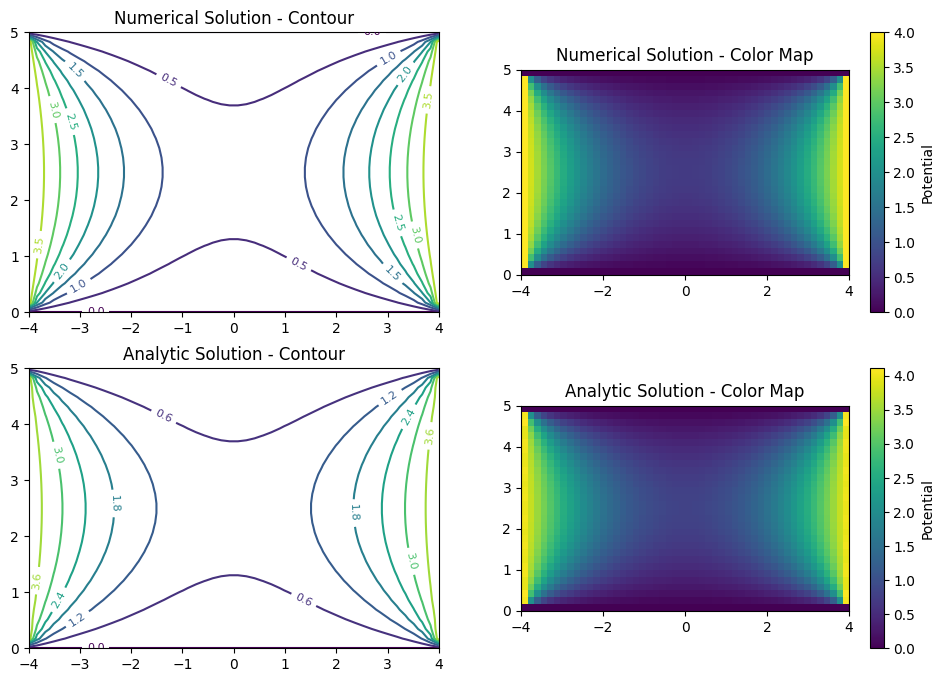

In [3]:
# Question 1

# Constants
a = 5  # The plate separation [m]
b = 4  # Distance between strips [m]
V0 = 4.0  # Constant potential [Volts]

# Initializing the Grid
x = np.linspace(-b, b, 50)
y = np.linspace(0, a, 30)
X, Y = np.meshgrid(x, y)

def analytic_solution(x, y):
    """Computes the analytic solution for the potential formed by two parallel grounded metal plates connected by 
    strips at a constant potential.

    Parameters: x and y coordinates

    Returns: 2D array representing the analytic solution for the potential
    """

    # Initialize the result as an array of zeros with the same shape as the length of grid
    result = np.zeros_like(x)

    # Perform a summation for odd values of n up to 50 and go up by 2 to get the odd numbers 1,3,5...
    for n in range(1, 100, 2):
        # Update the result using the formula for the analytic solution
        result += (1 / n) * np.sin(n * np.pi * y / a) * np.cosh(n * np.pi * x / a) / np.cosh(n * np.pi * b / a)

    # Multiply the result by a constant factor to obtain the final analytic solution
    return 4 * V0 / np.pi * result

def jacobi(V, max_iter=1000):
    """Perform Jacobi iteration to obtain a numerical solution for Laplace's equation in 2D. The formula for V_new
    essentially computes the average of the potential values at the neighboring grid points (left, right, below, and above) 
    and assigns this average value to the grid point (i,j) in the updated solution. It has factor of 0.25 = 1/4 due to
    the four boundaries we are implementing.

    Parameters:
    - V (np.array): Initial guess for the potential with boundary conditions.
    - tolerance (float): Convergence tolerance. Iteration stops when the maximum change in potential is below this threshold.
    - max_iter (int): Maximum number of iterations to perform.

    Returns:
    numpy.ndarray: 2D array representing the numerical solution for the potential.

    Reference: https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/15_iterative_methods_to_solve_matrix.html
    """

    m, n = V.shape  # Get the dimensions of the potential V
    V = V.copy()    # Make a copy of the input potential array for iteration

    # Perform Jacobi iteration
    for k in range(max_iter):
        # Create a new array to store the updated potential values
        V_new = V.copy()

        # Update the potential values for each grid point using Jacobi iteration
        for i in range(1, m-1):
            for j in range(1, n-1):
                # V_new = left of [i,j] + right of [i,j] + below of [i,j] + above of [i,j]
                V_new[i, j] = 0.25 * (V[i - 1, j] + V[i + 1, j] + V[i, j - 1] + V[i, j + 1])

        V = V_new  # Update old solution - Copy the updated potential values for the next iteration

    return V       # Return the final numerical solution

# Initial guess for the potential with boundary conditions
V_guess = np.zeros_like(X)
V_guess[:, 0] = V0     # Left boundary condition
V_guess[:, -1] = V0    # Right boundary condition
V_guess[0, :] = 0      # Bottom boundary condition
V_guess[-1, :] = 0     # Top boundary condition

def plot_results(X, Y):
    """Plot the numerical and analytic solutions side by side for comparison."""
    # Obtain the numerical solution using Jacobi iteration
    numerical = jacobi(V_guess)   
    analytic = analytic_solution(X, Y)

    plt.figure(figsize=(18, 8))

    # Contour plot of the numerical solution
    plt.subplot(2, 3, 1)
    contour_num = plt.contour(X, Y, numerical, cmap='viridis')
    plt.clabel(contour_num, inline=True, fontsize=8)
    plt.title('Numerical Solution - Contour')

    # Color map (imshow) of the numerical solution
    plt.subplot(2, 3, 2)
    plt.imshow(numerical, extent=[-b, b, 0, a], cmap='viridis', origin='lower')
    plt.colorbar(label='Potential')
    plt.title('Numerical Solution - Color Map')

    # Contour plot of the analytic solution
    plt.subplot(2, 3, 4)
    contour_analytic = plt.contour(X, Y, analytic, cmap='viridis')
    plt.clabel(contour_analytic, inline=True, fontsize=8)
    plt.title('Analytic Solution - Contour')

    # Color map (imshow) of the analytic solution
    plt.subplot(2, 3, 5)
    plt.imshow(analytic, extent=[-b, b, 0, a], cmap='viridis', origin='lower')
    plt.colorbar(label='Potential')
    plt.title('Analytic Solution - Color Map')

    plt.show()

# Plot the results using the plotting function
plot_results(X, Y)

Comments #1
-----------------

<span style="color:palevioletred;"> The contour plots and color maps visually demonstrate the agreement between the two solutions, confirming the accuracy of the numerical approach in capturing the potential distribution within the given geometry.

## Question 2 [3 pts]

Consider question 1 again, except with a uniform charge density filling the space between the plates. Use 3 different charge densities: 𝜌 = 1 nC m3⁄ , 100 nC m3⁄ , and 1000 nC m3⁄ . There is no need to find an analytic solution for comparison.

Comments #2
-----------------

<span style="color:palevioletred;"> stuff.

## Question 3 [5 pts]

Repeat question 2 with 𝜌 = 100 nC m3⁄ using a direct matrix solution rather than Jacobi iteration. Compare your result with the result from question 2.

In [ ]:
# Question 3

Comments #3
-----------------
Compare your result with the result from question 2.

<span style="color:palevioletred;"> stuff.

## Conclusion

<span style="color:palevioletred;"> stuff.